## Exploratory data analysis

We'll need:
- Pandas library to load, prepare, and analyze the data
- Numpy to simplify sorting and math operations for arrays & series
- Stats from Scipy to compare sample means and obtain p-value
- Pyplot from matplotlib & Seaborn to plot data

In [30]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [31]:
# Import data from csv files
try:
    # cab company name and ride data
    df_company_name_trips = pd.read_csv('./project_sql_result_01.csv')
    print(df_company_name_trips.head(5))
    print()

    # drop off location and average trips
    df_drop_off_loc_trips = pd.read_csv('./project_sql_result_04.csv')
    print(df_drop_off_loc_trips.head(5))
except:
    print("File(s) not found, please check file path(s) are correct")    

                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                 Medallion Leasin         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000


In [32]:
# Check duplicates, null values, and data types
print(df_company_name_trips.duplicated().sum())

df_company_name_trips.info()

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [33]:
df_company_name_trips.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [34]:
df_company_name_trips['% of total trips'] = np.round((df_company_name_trips['trips_amount'] / df_company_name_trips['trips_amount'].sum()) * 100, 1)
df_company_name_trips.head(10)

,company_name,trips_amount,% of total trips
0,Flash Cab,19558,14.2
1,Taxi Affiliation Services,11422,8.3
2,Medallion Leasin,10367,7.6
3,Yellow Cab,9888,7.2
4,Taxi Affiliation Service Yellow,9299,6.8
5,Chicago Carriage Cab Corp,9181,6.7
6,City Service,8448,6.2
7,Sun Taxi,7701,5.6
8,Star North Management LLC,7455,5.4
9,Blue Ribbon Taxi Association Inc.,5953,4.3


In [35]:
# Check duplicates, null values, and data types
print(df_drop_off_loc_trips.duplicated().sum())

df_drop_off_loc_trips.info()

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [36]:
# Change average_trips from float to int
df_drop_off_loc_trips['average_trips'] = np.round(df_drop_off_loc_trips['average_trips']).astype(int)

In [37]:
df_drop_off_loc_trips.describe()

,average_trips
count,94.000000
mean,599.957447
std,1714.615082
min,2.000000
25%,14.000000
50%,52.000000
75%,298.750000
max,10727.000000


In [38]:
# Top 10 neighborhoods by drop-offs
df_drop_off_loc_trips.sort_values('average_trips', ascending=False).head(10)

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9524
2,Streeterville,6665
3,West Loop,5164
4,O'Hare,2547
5,Lake View,2421
6,Grant Park,2069
7,Museum Campus,1510
8,Gold Coast,1364
9,Sheffield & DePaul,1260


In [39]:
df_drop_off_loc_trips['% of total dropoffs'] = np.round((df_drop_off_loc_trips['average_trips'] / df_drop_off_loc_trips['average_trips'].sum()) * 100, 1)
df_drop_off_loc_trips.head(10)

,dropoff_location_name,average_trips,% of total dropoffs
0,Loop,10727,19.0
1,River North,9524,16.9
2,Streeterville,6665,11.8
3,West Loop,5164,9.2
4,O'Hare,2547,4.5
5,Lake View,2421,4.3
6,Grant Park,2069,3.7
7,Museum Campus,1510,2.7
8,Gold Coast,1364,2.4
9,Sheffield & DePaul,1260,2.2


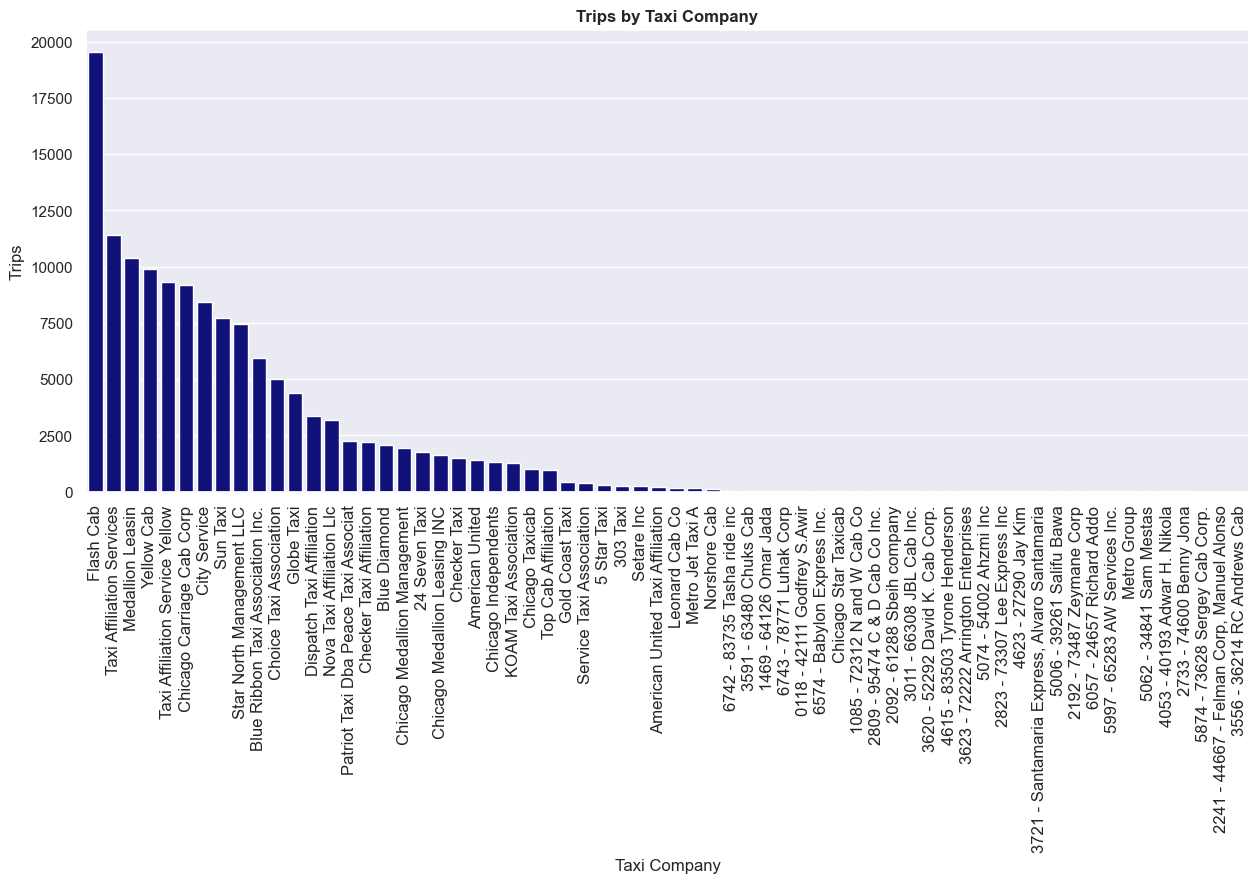

In [40]:
# Chart of taxi company and number of rides

# set plot style:
sns.set(style="darkgrid")

plt.figure(figsize=(15, 6))
total = df_company_name_trips.reset_index()
bar1 = sns.barplot(x="company_name",  y="trips_amount", data=total, color='darkblue')
plt.tick_params(axis='x', rotation=90, labelsize=12)
plt.xlabel('Taxi Company')
plt.ylabel('Trips')
plt.title('Trips by Taxi Company',
          fontweight='bold', fontsize=12)

plt.show()

There's a lot of variation in the number of trips across taxi companies and the majority of the business is concentrated in a handful of companies, the busiest is Flash Cab, followed by Taxi Affiliation Services. The number of trips conducted by the top 6 companies is equal to the number of trips conducted by the other 58 companies combined.

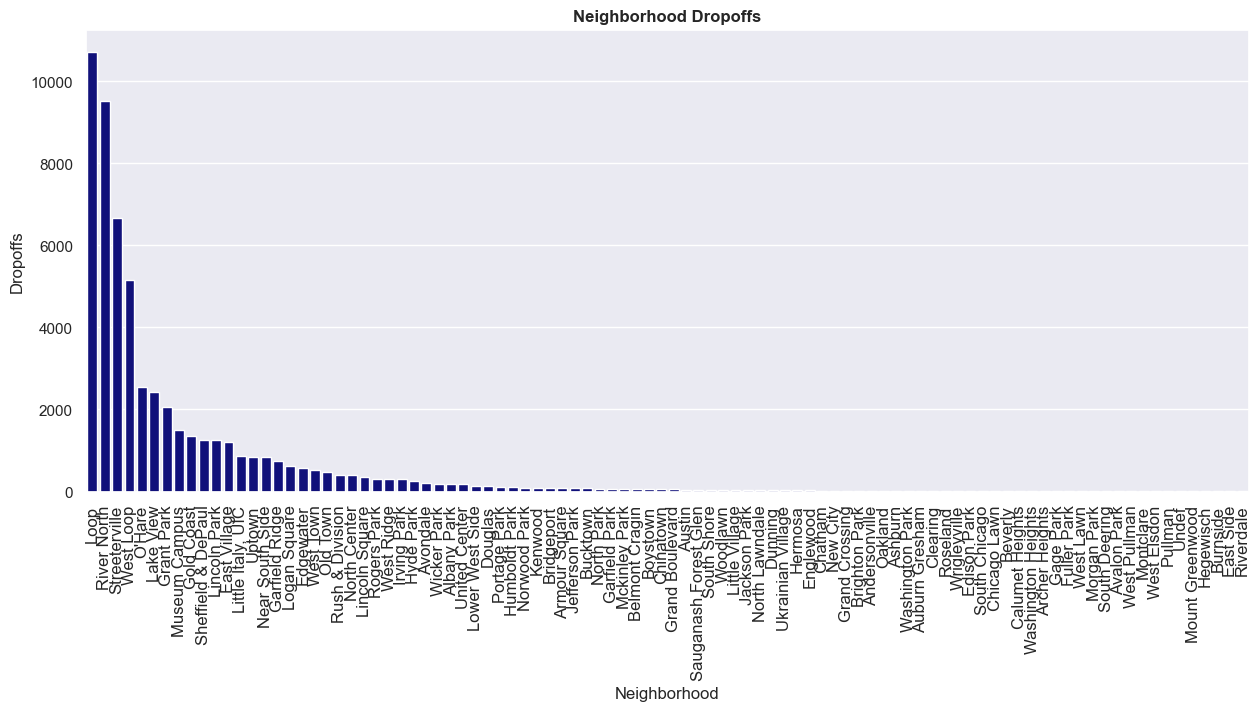

In [41]:
# Chart of top 10 neighborhoods by dropoffs

# set plot style:
sns.set(style="darkgrid")

plt.figure(figsize=(15, 6))
total = df_drop_off_loc_trips.reset_index()
bar1 = sns.barplot(x="dropoff_location_name",  y="average_trips", data=total, color='darkblue')
plt.tick_params(axis='x', rotation=90, labelsize=12)
plt.xlabel('Neighborhood')
plt.ylabel('Dropoffs')
plt.title('Neighborhood Dropoffs',
          fontweight='bold', fontsize=12)

plt.show()

There's a lot of variation in the average number of dropoffs across neighborhoods, the busiest is Loop, followed by River North. The total average number of dropoffs in top 4 neighborhoods are more than the remaining 90 neighborhoods combined.

## Testing hypotheses 

In [42]:
# Import data from csv file
try:
    # rides from Loop to O'Hare International Airport
    df_loop_ohare_ride_weather = pd.read_csv('./project_sql_result_07.csv')
    print(df_loop_ohare_ride_weather.head(5))
except:
    print("File(s) not found, please check file path(s) are correct")  

              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0


In [43]:
df_loop_ohare_ride_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [44]:
# Convert start_ts from object to datetime
df_loop_ohare_ride_weather['start_ts'] = pd.to_datetime(df_loop_ohare_ride_weather['start_ts'])

# Add new column with day name
df_loop_ohare_ride_weather['day_name'] = df_loop_ohare_ride_weather['start_ts'].dt.day_name()

# Get list of unique values in day_name column
df_loop_ohare_ride_weather['day_name'].unique()

# All rides in this dataframe happened on a Saturday

array(['Saturday'], dtype=object)

In [45]:
df_loop_ohare_ride_weather['duration_seconds'].describe()

# Some rides have duration 0 seconds

count    1068.000000
mean     2071.731273
std       769.461125
min         0.000000
25%      1438.250000
50%      1980.000000
75%      2580.000000
max      7440.000000
Name: duration_seconds, dtype: float64

In [46]:
# Drop rows where ride duration is 0
df_loop_ohare_ride_weather = df_loop_ohare_ride_weather[df_loop_ohare_ride_weather['duration_seconds'] != 0]
df_loop_ohare_ride_weather['duration_seconds'].describe()

count    1062.000000
mean     2083.435970
std       755.651796
min        60.000000
25%      1440.000000
50%      1980.000000
75%      2580.000000
max      7440.000000
Name: duration_seconds, dtype: float64

The choice of 0.05 for alpha is a reasonable balance between the risk of making a Type I error (rejecting the null hypothesis when it is actually true) and the t-test in this case.

In [47]:
# Hypothesis: The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays

# H0(null): average duration of rides on sunny Saturdays = average duration of rides on rainy Saturdays
# H1(alternative): average duration of rides on sunny Saturdays != average duration of rides on rainy Saturdays
# This is a 2-sided test

sample_1 = df_loop_ohare_ride_weather[df_loop_ohare_ride_weather['weather_conditions'] == 'Good']['duration_seconds']

sample_2 = df_loop_ohare_ride_weather[df_loop_ohare_ride_weather['weather_conditions'] == 'Bad']['duration_seconds']

alpha = 0.05

variance_test = st.levene(sample_1, sample_2)

if variance_test.pvalue < alpha:
    Levene_test_result = False
else:
    Levene_test_result = True

print('Variances of the populations should be considered equal?', Levene_test_result)

# Since p-value from levene test is less than alpha, we conclude that variances of the two samples are not equal

results = st.ttest_ind(sample_1, sample_2, equal_var=Levene_test_result)

print('T-test p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")


Variances of the populations should be considered equal? True
T-test p-value:  1.3318772977743245e-11
We reject the null hypothesis


P-value was less than alpha, so we reject the null hypothesis, and conclude that average duration of rides from the Loop to O'Hare International Airport on rainy Saturdays is significantly different than on sunny Saturdays.